<a href="https://colab.research.google.com/github/Arman001/marketing-with-ml/blob/main/Dynamic_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dynamic Pricing with Machine Learning**


***
### **By:** Muhammad Saad
***


## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


## Load the dataset


In [ ]:
# Load data directly from UCI URL
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
dataset = pd.read_excel(url)


In [ ]:
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Data Preprocessing

### Data Cleaning

In [ ]:
# Drop rows with missing CustomerID
dataset = dataset.dropna(subset=['CustomerID'])

# Filter out returns or negative quantities
dataset = dataset[dataset['Quantity'] > 0]  # Keep only positive quantities

In [ ]:
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Feature Engineering

In [ ]:
# Convert InvoiceDate to datetime
dataset['InvoiceDate'] = pd.to_datetime(dataset['InvoiceDate'])

# Calculate total price per transaction
dataset['TotalPrice'] = dataset['Quantity'] * dataset['UnitPrice']

# Use .loc to avoid SettingWithCopyWarning
dataset.loc[:, 'Year'] = dataset['InvoiceDate'].dt.year
dataset.loc[:, 'Month'] = dataset['InvoiceDate'].dt.month
dataset.loc[:, 'Day'] = dataset['InvoiceDate'].dt.day
dataset.loc[:, 'Hour'] = dataset['InvoiceDate'].dt.hour

# Aggregate daily sales per item to get demand per product
daily_sales = dataset.groupby(['StockCode', 'Year', 'Month', 'Day']).agg({
    'Quantity': 'sum',
    'TotalPrice': 'sum'
}).reset_index()

In [ ]:
daily_sales.head()

,StockCode,Year,Month,Day,Quantity,TotalPrice
0,10002,2010,12,1,60,51.00
1,10002,2010,12,3,1,0.85
2,10002,2010,12,5,1,0.85
3,10002,2010,12,6,24,20.40
4,10002,2010,12,8,12,10.20


### Train Test Split

In [ ]:
# Define features and target variable
X = daily_sales[['Quantity', 'Year', 'Month', 'Day']]
y = daily_sales['TotalPrice']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.head()

,Quantity,Year,Month,Day
0,60,2010,12,1
1,1,2010,12,3
2,1,2010,12,5
3,24,2010,12,6
4,12,2010,12,8


In [ ]:
y.head()

,TotalPrice
0,51.00
1,0.85
2,0.85
3,20.40
4,10.20


## Random Forest Training


In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

## Predictions

In [ ]:
y_pred = model.predict(X_test)

## Evaluation

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 206.57256524223786


## Dynamic Pricing

### Dynamic Pricing Calculaitng

In [ ]:
# Dynamic Pricing Function
def dynamic_pricing(predicted_sales, base_price=10.0, high_demand_threshold=500):
    if predicted_sales > high_demand_threshold:
        return base_price * 1.1  # Increase price by 10%
    else:
        return base_price * 0.9  # Decrease price by 10%

# Apply dynamic pricing to the predictions
base_price = 10.0
prices = [dynamic_pricing(sales, base_price) for sales in y_pred]

In [ ]:
prices

[9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0

### Plotting the Prices

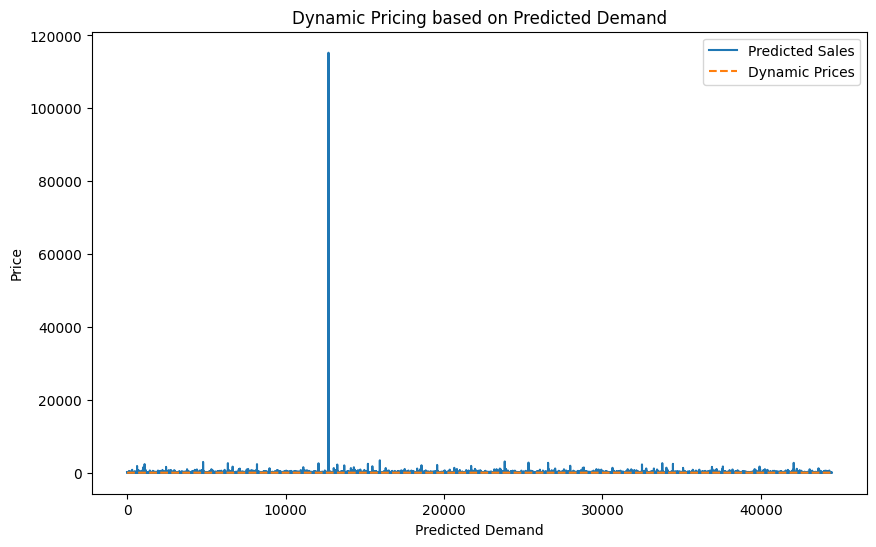

In [ ]:
# Plot dynamic prices vs predicted demand
plt.figure(figsize=(10, 6))
plt.plot(y_pred, label='Predicted Sales')
plt.plot(prices, label='Dynamic Prices', linestyle='--')
plt.xlabel('Predicted Demand')
plt.ylabel('Price')
plt.legend()
plt.title('Dynamic Pricing based on Predicted Demand')
plt.show()